<a href="https://colab.research.google.com/drive/1kZGp6WY33b0VrBLA8jhhOSSMZ545mFTH?usp=sharing"
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Rock-Paper-Scissors: A Multi-class Classification**
**Rock-Paper-Scissors-dataset**
Rock Paper Scissors is a dataset containing 2,892 images of diverse hands in Rock/Paper/Scissors poses. It is licensed CC By 2.0 and available for all purposes, but it’s intent is primarily for learning and research.

Rock Paper Scissors contains images from a variety of different hands,  from different races, ages and genders, posed into Rock / Paper or Scissors and labelled as such. You can download the training set here, and the test set here. These images have all been generated using CGI techniques as an experiment in determining if a CGI-based dataset can be used for classification against real images. I also generated a few images that you can use for predictions. Each image is **300 x 300 pixels** in **24-bit color**


Here you can see that both the training and
validation have three subdirectories.
One for Rock, one for Paper, and one for Scissors.
In these, we can put training and validation images for Rock, Paper, and Scissors. 
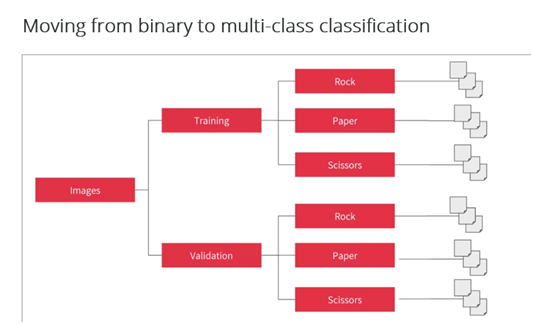

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-09-30 17:07:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   113MB/s    in 1.7s    

2020-09-30 17:07:20 (113 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-09-30 17:07:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.128, 74.125.141.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: 

In [ ]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

Show the total training count for: Rock images, Paper images and Scissors images. first you must include the rock, paper and scissors directory

In [ ]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-092.png', 'rock03-108.png', 'rock02-086.png', 'rock02-018.png', 'rock07-k03-090.png', 'rock06ck02-090.png', 'rock06ck02-081.png', 'rock04-118.png', 'rock05ck01-113.png', 'rock01-074.png']
['paper05-033.png', 'paper02-043.png', 'paper04-077.png', 'paper02-059.png', 'paper03-048.png', 'paper05-009.png', 'paper04-005.png', 'paper04-059.png', 'paper04-003.png', 'paper06-108.png']
['scissors02-057.png', 'scissors01-110.png', 'testscissors03-101.png', 'testscissors02-004.png', 'scissors04-069.png', 'testscissors03-014.png', 'scissors01-029.png', 'scissors03-119.png', 'scissors02-016.png', 'testscissors01-094.png']


For rock, paper and scissors we have 840 images each for them.

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. 


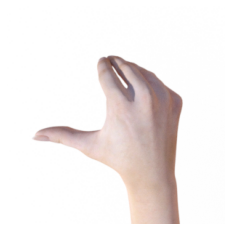

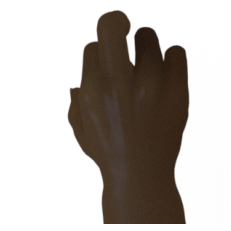

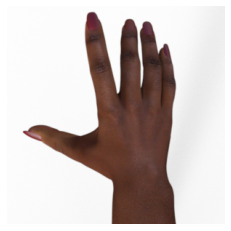

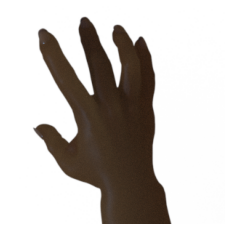

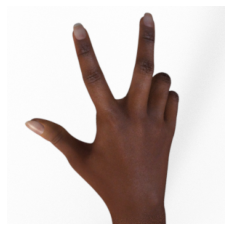

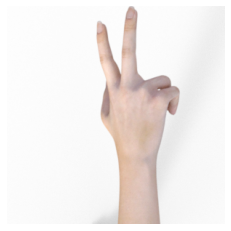

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

### **Understanding ImageGenerators**
One feature of the image generator is that you can point it at a directory and then the sub-directories of that will automatically generate labels for you.In short: The training set is the data that is used to tell the neural network model that 'this is what a cat looks like' and 'this is what a dog looks like'.

### **Preprocess image with ImageDataGenerator and Image Augmentation**
In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches

In [ ]:
TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


### **Build(layers) and compile network**
    1st convolution: Desired image size 150x150, 3 color bytes
    2nd layer: ConvD 64,3,3
    3rd and 4th layer: 128,3,3
    flatter & Dropout(0.5) layer
    Dense layers: 512 and 1

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
# compile network with history and augmentation
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

history = model.fit(train_generator, 
                    epochs=5, steps_per_epoch=5, 
                    validation_data = validation_generator, 
                    verbose = 1, validation_steps=3)

Epoch 1/5
5/5 [==============================] - 41s 8s/step - loss: 3.8711 - accuracy: 0.3460 - val_loss: 1.1057 - val_accuracy: 0.3333
Epoch 2/5
5/5 [==============================] - 41s 8s/step - loss: 1.1103 - accuracy: 0.3619 - val_loss: 1.1019 - val_accuracy: 0.3333
Epoch 3/5
5/5 [==============================] - 40s 8s/step - loss: 1.0994 - accuracy: 0.3270 - val_loss: 1.1165 - val_accuracy: 0.3333
Epoch 4/5
5/5 [==============================] - 41s 8s/step - loss: 1.0956 - accuracy: 0.3492 - val_loss: 1.0806 - val_accuracy: 0.6075
Epoch 5/5
5/5 [==============================] - 40s 8s/step - loss: 1.0722 - accuracy: 0.4143 - val_loss: 1.0685 - val_accuracy: 0.4624


## **Summary**
In this step we reduced the epochs to only 5, the results were expect to be under 50%. They were both under 50% with a slight overfitting. The results of the graph and the training data shows **training acc = 41%** and **validation acc = 46%** 



The **Loss and Accuracy** are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. **Loss Accuracy** is the portion of correct guesses or how well the network training is doing. The **Validation** accuracy is the measurement with the data that has not been used in training

### **Import image to check accuracy of between rosk, paper and scissors**

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving rock01-002.png to rock01-002.png
rock01-002.png
[[0.47878966 0.5212103  0.        ]]
